In [171]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [172]:
import numpy as np
import pandas as pd

In [173]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [174]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [175]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [176]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [177]:
# View all classes
Base.classes.keys()

['measurement', 'station']

In [178]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [179]:
session = Session(engine)

In [180]:
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22a077af1d0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [357]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
end_date = last_date[0]
end_date

'2017-08-23'

# Exploratory Climate Analysis

In [183]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_month = last_date[0].split("-")[1]
last_year = last_date[0].split("-")[0]
previous_year = int(last_year) - 1
 
begin_period = dt.date(previous_year, int(last_month), 1)

# Query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= begin_period).\
            order_by(Measurement.date.desc()).all()

results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [335]:
date = [result[0] for result in results]
prcp = [result[1] for result in results]

prcp_dict = {}
for date, prcp in results:
        prcp_dict[date] = prcp
prcp_dict

{'2017-08-23': 0.45,
 '2017-08-22': 0.5,
 '2017-08-21': 0.56,
 '2017-08-20': None,
 '2017-08-19': 0.09,
 '2017-08-18': None,
 '2017-08-17': 0.13,
 '2017-08-16': 0.42,
 '2017-08-15': 0.42,
 '2017-08-14': 0.22,
 '2017-08-13': None,
 '2017-08-12': 0.14,
 '2017-08-11': None,
 '2017-08-10': 0.07,
 '2017-08-09': 0.15,
 '2017-08-08': 0.34,
 '2017-08-07': 0.05,
 '2017-08-06': None,
 '2017-08-05': None,
 '2017-08-04': 0.0,
 '2017-08-03': 0.06,
 '2017-08-02': 0.25,
 '2017-08-01': None,
 '2017-07-31': 0.0,
 '2017-07-30': 0.3,
 '2017-07-29': 0.3,
 '2017-07-28': 0.4,
 '2017-07-27': 0.0,
 '2017-07-26': 0.3,
 '2017-07-25': 0.3,
 '2017-07-24': 0.84,
 '2017-07-23': 0.8,
 '2017-07-22': 4.0,
 '2017-07-21': 0.1,
 '2017-07-20': 0.7,
 '2017-07-19': 0.27,
 '2017-07-18': 2.4,
 '2017-07-17': 0.39,
 '2017-07-16': 0.5,
 '2017-07-15': 0.1,
 '2017-07-14': 0.68,
 '2017-07-13': 0.68,
 '2017-07-12': 0.05,
 '2017-07-11': 0.0,
 '2017-07-10': 0.02,
 '2017-07-09': 0.0,
 '2017-07-08': 0.02,
 '2017-07-07': 0.3,
 '2017-07-0

In [297]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df = pd.DataFrame(results, columns=['date', 'precipitation'])
prcp_data_df.set_index('date', inplace=True)

prcp_data_df.head()

precipitation
date                     
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45
2017-08-22           0.00

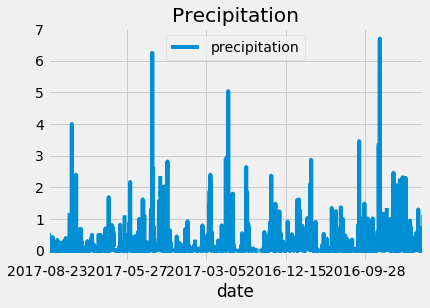

<Figure size 432x288 with 0 Axes>

In [298]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot()
plt.title("Precipitation")

plt.show()
plt.tight_layout()

![precipitation](Images/precipitation.png)

In [299]:
prcp_data_df.describe()

precipitation
count    2143.000000
mean        0.179258
std         0.457708
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max         6.700000

![describe](Images/describe.png)

In [300]:
# Show how many stations are available in this dataset
session.query(func.count(Measurement.station)).group_by(Measurement.station).count()

9

In [301]:
# Find most active stations
stations_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()

stations_count_df = pd.DataFrame(stations_count, columns=['station', 'count'])
stations_count_df.sort_values("count", ascending=False)

station  count
6  USC00519281   2772
7  USC00519397   2724
1  USC00513117   2709
8  USC00519523   2669
3  USC00516128   2612
2  USC00514830   2202
0  USC00511918   1979
4  USC00517948   1372
5  USC00518838    511

In [302]:
most_active = stations_count_df['station'].iloc[0]
print(most_active)

USC00511918


In [305]:
# Calculate the lowest, highest and average temperature of the most active station
lowest_temp = session.query(func.min(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()

highest_temp = session.query(func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active).all()

In [319]:
# Find the latest observation for the most active station
last_date = session.query(func.max(Measurement.date)).\
                filter(Measurement.station == most_active).all()

# Calculate the date 1 year ago from the last data point in the database
last_month = last_date[0][0].split("-")[1]
last_year = last_date[0][0].split("-")[0]
previous_year = int(last_year) - 1
begin_period = dt.date(previous_year, int(last_month), 1)

[('2015-10-30')]

In [322]:
# Query the last 12 months of temperature observation data for this station
station_data = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == most_active).\
                filter(Measurement.date >= begin_period).\
                order_by(Measurement.date.desc()).all()

station_data[:10]

[('2015-10-30', 64.0),
 ('2015-10-29', 68.0),
 ('2015-10-28', 82.0),
 ('2015-10-26', 72.0),
 ('2015-10-25', 74.0),
 ('2015-10-22', 71.0),
 ('2015-10-21', 71.0),
 ('2015-10-20', 75.0),
 ('2015-10-19', 71.0),
 ('2015-10-16', 72.0)]

In [313]:
# Save the query results as a Pandas DataFrame and set the index to the date column
station_data_df = pd.DataFrame(station_data, columns=['date', 'tobs'])
station_data_df.set_index('date', inplace=True)

station_data_df.head()

tobs
date            
2015-10-30  64.0
2015-10-29  68.0
2015-10-28  82.0
2015-10-26  72.0
2015-10-25  74.0

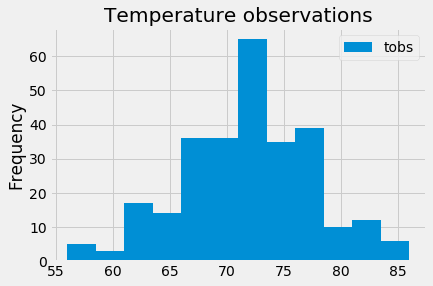

<Figure size 432x288 with 0 Axes>

In [325]:
# Plot the data as a histrogram
station_data_df.plot(kind='hist', bins=12)
plt.title("Temperature observations")

plt.show()
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [338]:
# Function that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [352]:
# Calculate the tmin, tavg, and tmax for trip using the previous year's data for those same dates.
trip_stats = calc_temps('2017-07-01', '2017-07-14')
tavg = trip_stats[0][1]
tavg

78.11627906976744